In [16]:
import os
import pickle

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
stat_test_name = "test_mnist"

stat_tests_path = "stat_tests"
stat_test_path = os.path.join(stat_tests_path, stat_test_name)
if not os.path.exists(stat_test_path):
    raise FileNotFoundError(f"Stat test path {stat_test_path} does not exist.")

init_params_path = os.path.join(stat_test_path, "init_params.pkl")
test_params_path = os.path.join(stat_test_path, "test_params.pkl")

with open(init_params_path, "rb") as f:
    init_params = pickle.load(f)
with open(test_params_path, "rb") as f:
    test_params = pickle.load(f)

print("Init params:")
for k, v in init_params.items():
    print(f"{k}: {v}")

num_tests = init_params["num_tests"]

tests_results = []  # 2-dim list [idx of repeated test][idx of test]
for i in range(num_tests):
    test_path = os.path.join(stat_test_path, f"test_{i}")
    test_result_path = os.path.join(test_path, "test_results.pkl")
    with open(test_result_path, "rb") as f:
        test_result = pickle.load(f)
    tests_results.append(test_result)

Init params:
test_name: test_mnist
dataset_name: mnist
num_clients: 5
num_classes: 10
distribution_type: dirichlet
model_name: simple_cnn
loss_name: cross_entropy
trainer_name: sgd
train_epochs: 5
info_batch_size: 10
info_use_converter: False
target_client: 0
num_tests: 10


In [18]:
subtest = 0

subtest_params = []
subtest_results = []    # 2-dim list [idx of test][idx of repeated test]
for i, test_param in enumerate(test_params):
    if test_param["subtest"] == subtest:
        subtest_params.append(test_param)
        subtest_results.append([])
        for j in range(num_tests):
            subtest_results[-1].append(tests_results[j][i])

KeyError: 'subtest'

Subtest params:
unlearning_method: information
retrain_epochs: 2
[np.int64(70), np.int64(70), np.int64(70), np.int64(70), np.int64(70), np.int64(70), np.int64(70), np.int64(70)]
[np.float64(0.9889), np.float64(0.9889), np.float64(0.9889), np.float64(0.9889), np.float64(0.9889), np.float64(0.9889), np.float64(0.9889), np.float64(0.9889)]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


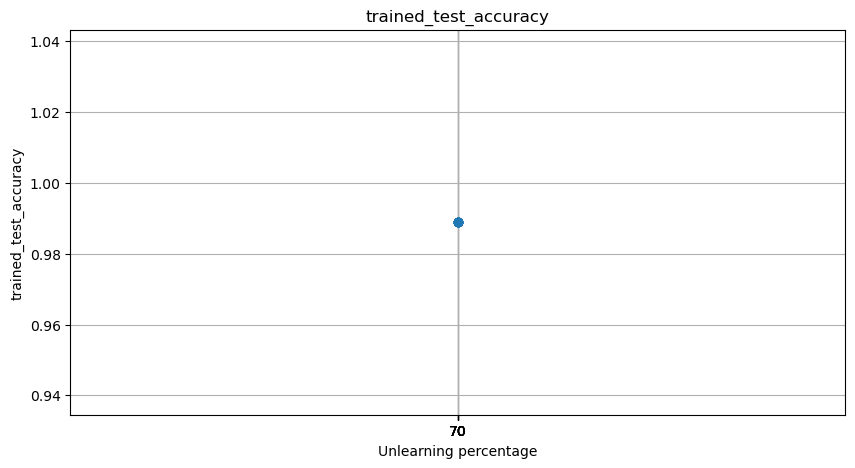

In [ ]:
print("Subtest params:")
for key, value in subtest_params[0].items():
    if key == "unlearning_percentage":
        continue
    print(f"{key}: {value}")

percentages = []
for test_param in subtest_params:
    percentages.append(test_param["unlearning_percentage"])

key = "trained_test_accuracy"
test_accuracies_avg = []
test_accuracies_std = []
for results in subtest_results:
    test_accuracies = [results[i][key] for i in range(num_tests)]
    test_accuracies_avg.append(np.mean(test_accuracies))
    test_accuracies_std.append(np.std(test_accuracies))

# Test accuracies plot
plt.figure(figsize=(10, 5))
plt.errorbar(percentages, test_accuracies_avg, yerr=test_accuracies_std, fmt='o')
plt.title(key)
plt.xlabel("Unlearning percentage")
plt.ylabel(key)
plt.xticks(percentages)
plt.grid()
plt.show()